In [361]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import calendar

In [362]:
key_sku = pd.read_csv("data/KEY_SKU.csv")
marketing_spend = pd.read_csv("data/Marketing_Spend.csv")
online = pd.read_csv("data/Online.csv")
retail = pd.read_csv("data/Retail.csv")

In [363]:
for tab in [key_sku, marketing_spend, online, retail]:
    tab.info()
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1178 entries, 0 to 1177
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Product SKU  1178 non-null   object
 1   StockCode    1178 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 18.5+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     365 non-null    object 
 1   Offline Spend  365 non-null    int64  
 2   Online Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54144 entries, 0 to 54143
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Transaction ID                         

# 1. Normalisasi

## 1.1 key_sku

In [364]:
key_sku.head()

,Product SKU,StockCode
0,GGOENEBQ079099,21421
1,GGOENEBQ079199,21422
2,GGOENEBQ084699,22178
3,GGOEGAEB091117,20749
4,GGOENEBB078899,21056


## 1.2 Marketing Spend

In [365]:
marketing_spend.head()

,Unnamed: 0,Offline Spend,Online Spend
0,2017-01-01,4500,2424.50
1,2017-01-02,4500,3480.36
2,2017-01-03,4500,1576.38
3,2017-01-04,4500,2928.55
4,2017-01-05,4500,4055.30


In [366]:
marketing_spend.rename(columns={'Unnamed: 0':'Date'}, inplace=True)
marketing_spend.head()

,Date,Offline Spend,Online Spend
0,2017-01-01,4500,2424.50
1,2017-01-02,4500,3480.36
2,2017-01-03,4500,1576.38
3,2017-01-04,4500,2928.55
4,2017-01-05,4500,4055.30


## 1.3 Online

In [367]:
online["Date"] = online["Date"].astype(str)
online["Date"]

0        20171231
1        20171231
2        20171231
3        20171231
4        20171231
           ...   
54139    20170101
54140    20170101
54141    20170101
54142    20170101
54143    20170101
Name: Date, Length: 54144, dtype: object

In [368]:
date_list = list(online["Date"])
for i in range(len(date_list)):
    date_list[i] = datetime.strptime(date_list[i], '%Y%m%d').strftime('%Y-%m-%d')
date_list[0:20]

['2017-12-31',
 '2017-12-31',
 '2017-12-31',
 '2017-12-31',
 '2017-12-31',
 '2017-12-31',
 '2017-12-31',
 '2017-12-31',
 '2017-12-31',
 '2017-12-31',
 '2017-12-31',
 '2017-12-31',
 '2017-12-31',
 '2017-12-31',
 '2017-12-31',
 '2017-12-31',
 '2017-12-31',
 '2017-12-31',
 '2017-12-31',
 '2017-12-31']

In [369]:
online["Date"] = date_list
online.head()

,Transaction ID,Date,Product SKU,Product,Product Category (Enhanced E-commerce),Quantity,Avg. Price,Revenue,Tax,Delivery
0,48497,2017-12-31,GGOENEBQ079099,Nest® Protect Smoke + CO White Battery Alarm-USA,Nest-USA,4.0,80.52,316.00,34.44,19.99
1,48496,2017-12-31,GGOENEBQ079199,Nest® Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5.0,80.52,395.00,33.14,6.50
2,48495,2017-12-31,GGOENEBQ084699,Nest® Learning Thermostat 3rd Gen-USA - White,Nest-USA,1.0,151.88,149.00,12.06,6.50
3,48494,2017-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1.0,48.92,47.99,3.82,6.50
4,48493,2017-12-31,GGOENEBB078899,Nest® Cam Indoor Security Camera - USA,Nest-USA,1.0,121.30,119.00,8.31,6.50


In [370]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54144 entries, 0 to 54143
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Transaction ID                          54144 non-null  int64  
 1   Date                                    54144 non-null  object 
 2   Product SKU                             54144 non-null  object 
 3   Product                                 54144 non-null  object 
 4   Product Category (Enhanced E-commerce)  52928 non-null  object 
 5   Quantity                                54139 non-null  float64
 6   Avg. Price                              54144 non-null  float64
 7   Revenue                                 54144 non-null  float64
 8   Tax                                     54144 non-null  float64
 9   Delivery                                54144 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 4.1+ MB


In [371]:
online.dropna(axis="rows", inplace=True)
online["Quantity"] = online["Quantity"].astype(int)

In [372]:
online.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52924 entries, 0 to 54143
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Transaction ID                          52924 non-null  int64  
 1   Date                                    52924 non-null  object 
 2   Product SKU                             52924 non-null  object 
 3   Product                                 52924 non-null  object 
 4   Product Category (Enhanced E-commerce)  52924 non-null  object 
 5   Quantity                                52924 non-null  int64  
 6   Avg. Price                              52924 non-null  float64
 7   Revenue                                 52924 non-null  float64
 8   Tax                                     52924 non-null  float64
 9   Delivery                                52924 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 4.4+ MB


In [373]:
online.head()

,Transaction ID,Date,Product SKU,Product,Product Category (Enhanced E-commerce),Quantity,Avg. Price,Revenue,Tax,Delivery
0,48497,2017-12-31,GGOENEBQ079099,Nest® Protect Smoke + CO White Battery Alarm-USA,Nest-USA,4,80.52,316.00,34.44,19.99
1,48496,2017-12-31,GGOENEBQ079199,Nest® Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,395.00,33.14,6.50
2,48495,2017-12-31,GGOENEBQ084699,Nest® Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,149.00,12.06,6.50
3,48494,2017-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,47.99,3.82,6.50
4,48493,2017-12-31,GGOENEBB078899,Nest® Cam Indoor Security Camera - USA,Nest-USA,1,121.30,119.00,8.31,6.50


## 1.4 Retail

In [374]:
retail.head()

,InvoiceNo,InvoiceDate,StockCode,Quantity
0,536598,2017-01-01,21421,1
1,536598,2017-01-01,21422,2
2,536598,2017-01-01,22178,26
3,536599,2017-01-01,20749,2
4,536599,2017-01-01,21056,2


In [375]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181247 entries, 0 to 181246
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   InvoiceNo    181247 non-null  int64 
 1   InvoiceDate  181247 non-null  object
 2   StockCode    181247 non-null  int64 
 3   Quantity     181247 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 5.5+ MB


## 1.5 Check Normalization

In [376]:
key_sku

,Product SKU,StockCode
0,GGOENEBQ079099,21421
1,GGOENEBQ079199,21422
2,GGOENEBQ084699,22178
3,GGOEGAEB091117,20749
4,GGOENEBB078899,21056
...,...,...
1173,GGOEGAXT065429,21816
1174,GGOEGAXH065329,20935
1175,GGOEAAWC062448,20678
1176,GGOEAAAJ034516,17191


In [377]:
marketing_spend

,Date,Offline Spend,Online Spend
0,2017-01-01,4500,2424.50
1,2017-01-02,4500,3480.36
2,2017-01-03,4500,1576.38
3,2017-01-04,4500,2928.55
4,2017-01-05,4500,4055.30
...,...,...,...
360,2017-12-27,4000,3396.87
361,2017-12-28,4000,3246.84
362,2017-12-29,4000,2546.58
363,2017-12-30,4000,674.31


In [378]:
online

,Transaction ID,Date,Product SKU,Product,Product Category (Enhanced E-commerce),Quantity,Avg. Price,Revenue,Tax,Delivery
0,48497,2017-12-31,GGOENEBQ079099,Nest® Protect Smoke + CO White Battery Alarm-USA,Nest-USA,4,80.52,316.00,34.44,19.99
1,48496,2017-12-31,GGOENEBQ079199,Nest® Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,395.00,33.14,6.50
2,48495,2017-12-31,GGOENEBQ084699,Nest® Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,149.00,12.06,6.50
3,48494,2017-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,47.99,3.82,6.50
4,48493,2017-12-31,GGOENEBB078899,Nest® Cam Indoor Security Camera - USA,Nest-USA,1,121.30,119.00,8.31,6.50
...,...,...,...,...,...,...,...,...,...,...
54139,16682,2017-01-01,GGOEGOXQ016399,Badge Holder,Office,31,1.99,954.95,57.75,6.50
54140,16682,2017-01-01,GGOEYAAB031816,YouTube Men's Short Sleeve Hero Tee Black,Apparel,5,17.53,954.95,57.75,6.50
54141,16681,2017-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,1.99,0.60,6.50
54142,16680,2017-01-01,GGOENEBJ079499,Nest® Learning Thermostat 3rd Gen-USA - Stainl...,Nest-USA,1,153.71,149.00,13.22,6.50


In [379]:
retail

,InvoiceNo,InvoiceDate,StockCode,Quantity
0,536598,2017-01-01,21421,1
1,536598,2017-01-01,21422,2
2,536598,2017-01-01,22178,26
3,536599,2017-01-01,20749,2
4,536599,2017-01-01,21056,2
...,...,...,...,...
181242,580137,2017-12-31,21977,1
181243,580137,2017-12-31,20914,6
181244,580137,2017-12-31,21034,3
181245,580137,2017-12-31,21588,1


# 1. Exploratory Data Analysis

In [380]:
for tab in [key_sku, marketing_spend, online, retail]:
    print(tab.nunique())
    print()

Product SKU    1178
StockCode      1178
dtype: int64

Date             365
Offline Spend     11
Online Spend     365
dtype: int64

Transaction ID                            25061
Date                                        365
Product SKU                                1145
Product                                     404
Product Category (Enhanced E-commerce)       20
Quantity                                    151
Avg. Price                                  546
Revenue                                    6028
Tax                                        3829
Delivery                                    267
dtype: int64

InvoiceNo      16522
InvoiceDate      292
StockCode       1178
Quantity         149
dtype: int64



In [381]:
online.head(10)

,Transaction ID,Date,Product SKU,Product,Product Category (Enhanced E-commerce),Quantity,Avg. Price,Revenue,Tax,Delivery
0,48497,2017-12-31,GGOENEBQ079099,Nest® Protect Smoke + CO White Battery Alarm-USA,Nest-USA,4,80.52,316.00,34.44,19.99
1,48496,2017-12-31,GGOENEBQ079199,Nest® Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,395.00,33.14,6.50
2,48495,2017-12-31,GGOENEBQ084699,Nest® Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,149.00,12.06,6.50
3,48494,2017-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,47.99,3.82,6.50
4,48493,2017-12-31,GGOENEBB078899,Nest® Cam Indoor Security Camera - USA,Nest-USA,1,121.30,119.00,8.31,6.50
5,48492,2017-12-31,GGOENEBQ086799,Nest® Thermostat E - USA,Nest,3,100.91,297.00,25.09,6.50
6,48491,2017-12-31,GGOENEBB078899,Nest® Cam Indoor Security Camera - USA,Nest-USA,1,121.30,376.00,0.00,6.50
7,48491,2017-12-31,GGOENEBQ079099,Nest® Protect Smoke + CO White Battery Alarm-USA,Nest-USA,2,80.52,376.00,0.00,6.50
8,48491,2017-12-31,GGOENEBQ086799,Nest® Thermostat E - USA,Nest,1,100.91,376.00,0.00,6.50
9,48490,2017-12-31,GGOENEBQ086799,Nest® Thermostat E - USA,Nest,1,100.91,99.00,9.50,6.50


In [382]:
online["Month"] = pd.DatetimeIndex(online["Date"]).month
online.head()

,Transaction ID,Date,Product SKU,Product,Product Category (Enhanced E-commerce),Quantity,Avg. Price,Revenue,Tax,Delivery,Month
0,48497,2017-12-31,GGOENEBQ079099,Nest® Protect Smoke + CO White Battery Alarm-USA,Nest-USA,4,80.52,316.00,34.44,19.99,12
1,48496,2017-12-31,GGOENEBQ079199,Nest® Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,395.00,33.14,6.50,12
2,48495,2017-12-31,GGOENEBQ084699,Nest® Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,149.00,12.06,6.50,12
3,48494,2017-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,47.99,3.82,6.50,12
4,48493,2017-12-31,GGOENEBB078899,Nest® Cam Indoor Security Camera - USA,Nest-USA,1,121.30,119.00,8.31,6.50,12


In [383]:
# banyak transaksi setiap hari
transaction_per_day = online.groupby('Date')['Transaction ID'].count().reset_index()
transaction_per_day = transaction_per_day.rename(columns={"Transaction ID":"Number of Transactions"})
#transaction_per_day.sort_values(by="Number of Transactions", ascending=False, inplace=True)
transaction_per_day["Month"] = pd.DatetimeIndex(transaction_per_day['Date']).month
transaction_per_day

,Date,Number of Transactions,Month
0,2017-01-01,89,1
1,2017-01-02,115,1
2,2017-01-03,207,1
3,2017-01-04,169,1
4,2017-01-05,189,1
...,...,...,...
360,2017-12-27,103,12
361,2017-12-28,80,12
362,2017-12-29,89,12
363,2017-12-30,61,12


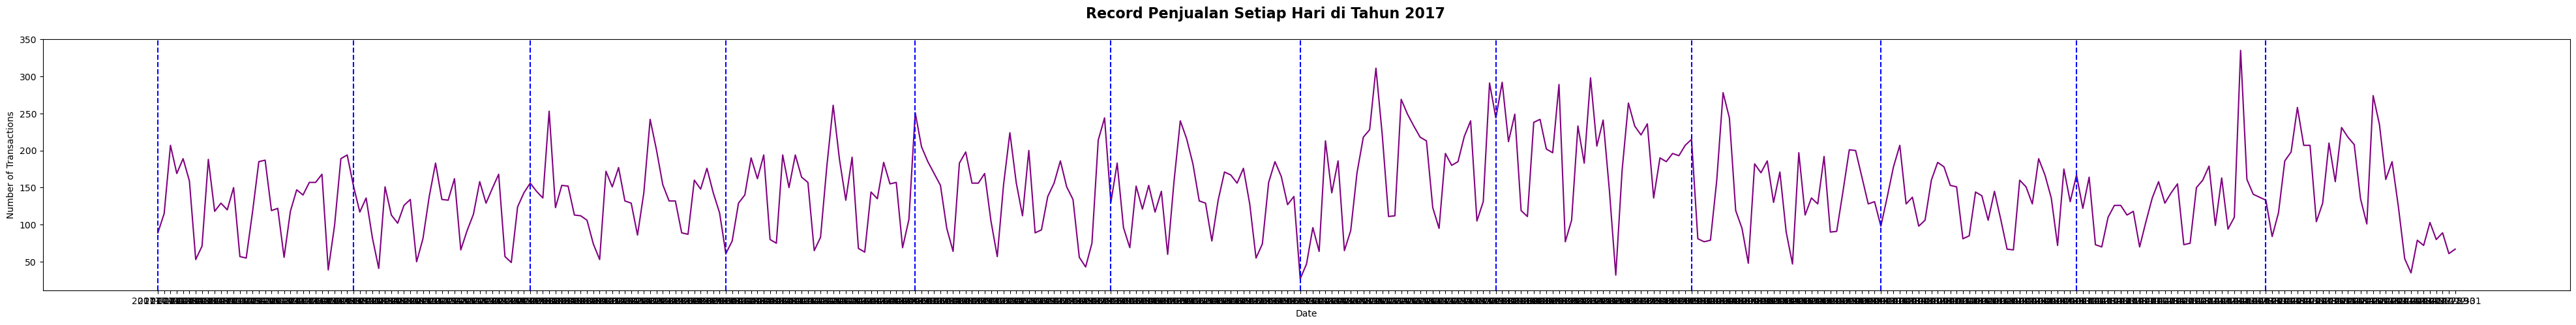

In [396]:
awal_bulan = ['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',]

fig, ax = plt.subplots(figsize=(50,5))
line = ax.plot(transaction_per_day["Date"], transaction_per_day["Number of Transactions"], color='purple')
fig.suptitle("Record Penjualan Setiap Hari di Tahun 2017", fontsize=16, fontweight="bold")
for bulan in awal_bulan:
    plt.axvline(bulan, linestyle="--", color="blue")
ax.set(xlabel="Date",
       ylabel="Number of Transactions")
plt.show();

In [385]:
# banyak transaksi setiap bulan
transaction_per_month = transaction_per_day.groupby('Month')['Number of Transactions'].sum().reset_index()
transaction_per_month['Month'] = transaction_per_month['Month'].apply(lambda x: calendar.month_abbr[x])
transaction_per_month

,Month,Number of Transactions
0,Jan,4063
1,Feb,3284
2,Mar,4346
3,Apr,4150
4,May,4572
5,Jun,4193
6,Jul,5251
7,Aug,6150
8,Sep,4288
9,Oct,4164


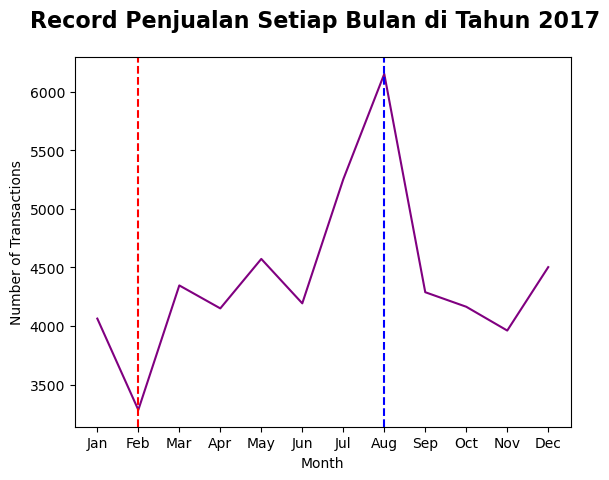

In [386]:
fig, ax = plt.subplots()
line = ax.plot(transaction_per_month["Month"], transaction_per_month["Number of Transactions"], color='purple')
fig.suptitle("Record Penjualan Setiap Bulan di Tahun 2017", fontsize=16, fontweight="bold")
plt.axvline('Aug', linestyle="--", color="blue")
plt.axvline('Feb', linestyle="--", color="red")
ax.set(xlabel="Month",
       ylabel="Number of Transactions")
plt.show();

In [387]:
# Most buyed product
most_buyed_product = online.groupby('Product')['Quantity'].sum().reset_index()
most_buyed_product.sort_values(by='Quantity', ascending=False, inplace=True)
most_buyed_product["Percentage (%)"] = (most_buyed_product["Quantity"]/most_buyed_product["Quantity"].sum())*100
most_buyed_product

,Product,Quantity,Percentage (%)
301,Maze Pen,16234,6.820063
101,Google 22 oz Water Bottle,14282,6.000008
212,Google Sunglasses,11452,4.811098
340,Sport Bag,7321,3.075624
192,Google Metallic Notebook Set,6496,2.729033
...,...,...,...
215,Google Tee Red,3,0.001260
13,Android 5-Panel Low Cap,3,0.001260
83,Compact Journal with Recycled Pages,1,0.000420
68,Android Women's Short Sleeve Tri-blend Badge T...,1,0.000420


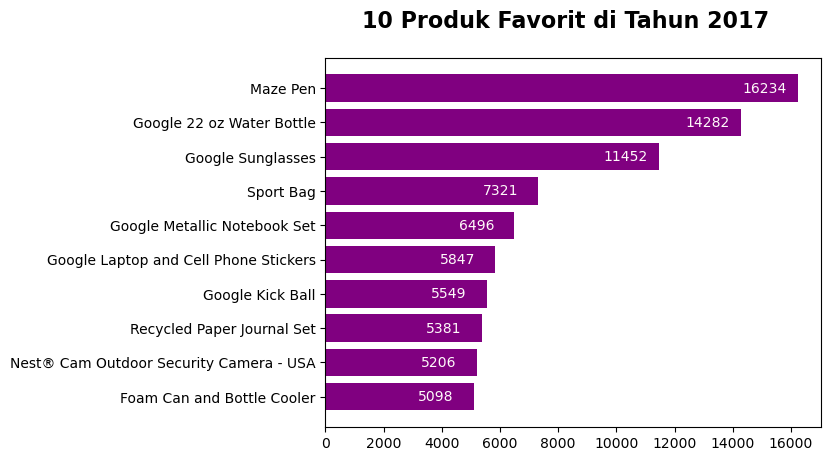

In [388]:
fig, ax = plt.subplots()
fig.suptitle("10 Produk Favorit di Tahun 2017", fontsize=16, fontweight="bold")
bars = ax.barh(most_buyed_product["Product"].head(10), most_buyed_product["Quantity"].head(10), color='purple')
ax.bar_label(bars, padding=-40, color='snow')
ax.invert_yaxis()
plt.show();

In [389]:
# Favorite category
favorite_category = online.groupby('Product Category (Enhanced E-commerce)')['Quantity'].sum().reset_index()
favorite_category.sort_values(by='Quantity', ascending=False, inplace=True)
favorite_category["Percentage (%)"] = (favorite_category["Quantity"]/favorite_category["Quantity"].sum())*100
favorite_category

,Product Category (Enhanced E-commerce),Quantity,Percentage (%)
18,Office,88383,37.130566
2,Apparel,32438,13.627522
6,Drinkware,30501,12.813770
12,Lifestyle,24881,10.452752
16,Nest-USA,21430,9.002953
4,Bags,15273,6.416337
17,Notebooks & Journals,9556,4.014569
10,Headgear,3533,1.484248
14,Nest,2837,1.191852
11,Housewares,2484,1.043553


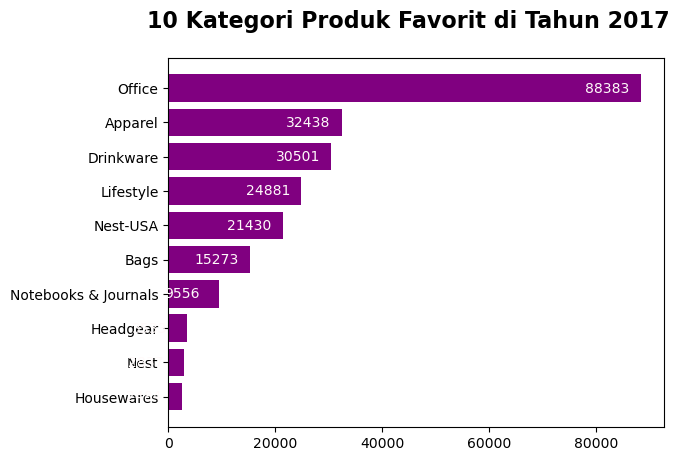

In [390]:
fig, ax = plt.subplots()
fig.suptitle("10 Kategori Produk Favorit di Tahun 2017", fontsize=16, fontweight="bold")
bars = ax.barh(favorite_category["Product Category (Enhanced E-commerce)"].head(10), favorite_category["Quantity"].head(10), color='purple')
ax.bar_label(bars, padding=-40, color='snow')
ax.invert_yaxis()
plt.show();